# Linear Regression Analysis


Linear Regression explores the relationship between at least two (independent and dependent) variables. Hereby, we are looking for a positive, negative or absent relationship - the formula y = mx + c describes c as the y intercept and mx as the slope.

In [17]:
from sklearn.model_selection import train_test_split #can also be imported from utils 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error #can also be imported from math 
import matplotlib.pyplot as plt, pandas as pd, numpy as np
%matplotlib inline 

Exploring the dataset and cleaning it

In [33]:
housing = pd.read_csv('Algorithms/data/housing.csv')

In [34]:
housing.head() #print top 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
housing.shape #total of entries in rows, colums

(20640, 10)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

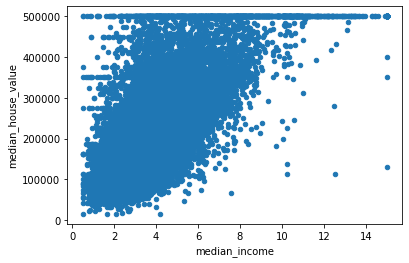

In [36]:
housing.plot.scatter("median_income", "median_house_value") #how would these two variables look / median

In [37]:
housing.describe() #getting the basic stats from the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
housing = housing.notna()

In [23]:
len(housing) #there were no NANs

20640

Linear Regression Part

In [38]:
#y achse = house value, x achse = income
x_train, x_test, y_train, y_test = train_test_split(housing.median_income, housing.median_house_value, test_size = 0.2)

In [39]:
regression = LinearRegression()

In [40]:
#shape model using one predictor, Reshape changes it from pandas to NumPy vertical shape vector 
regression.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [41]:
#pass the data to prediction
prediction = regression.predict(np.array(x_test).reshape(-1,1))

In [42]:
#comparing predictions to real values
y_test.head()

15836    338800.0
18178    337000.0
15576    166700.0
4188     185400.0
588      209200.0
Name: median_house_value, dtype: float64

In [43]:
prediction

array([223683.44287673, 188590.04854616, 166061.82969188, ...,
       173410.25073749, 170366.79703532, 268485.91249249])

In [44]:
#processing all the predictions to be compared to the real values
residuals = prediction - y_test

(array([1.000e+01, 6.600e+01, 1.750e+02, 4.870e+02, 1.508e+03, 1.762e+03,
        1.170e+02, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-405262.57026979, -319180.72825448, -233098.88623917,
        -147017.04422386,  -60935.20220854,   25146.63980677,
         111228.48182208,  197310.3238374 ,  283392.16585271,
         369474.00786802,  455555.84988334]),
 <BarContainer object of 10 artists>)

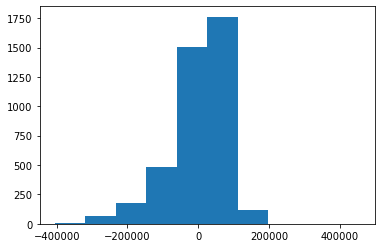

In [45]:
plt.hist(residuals)

In [46]:
mean_squared_error(y_test, prediction) ** 0.5

81807.6895911793